# Ordenamiento por tetris

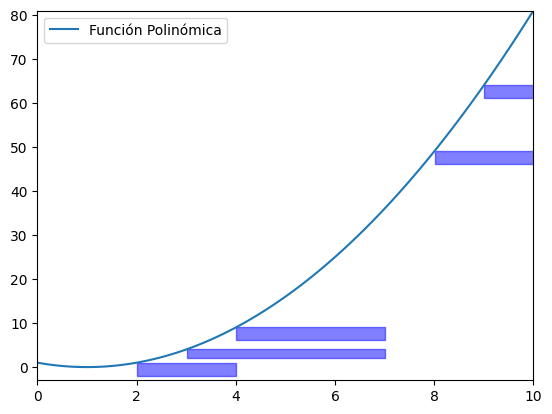

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

class Rectangulo:
    def __init__(self, ancho, alto, indice_cercania):
        self.ancho = ancho
        self.alto = alto
        self.indice_cercania = indice_cercania
        self.x = None
        self.y = None

    def area(self):
        return self.ancho * self.alto

    def se_superpone(self, otro_rectangulo):
        if self.x is None or self.y is None:
            return False

        return (
            self.x < otro_rectangulo.x + otro_rectangulo.ancho and
            self.x + self.ancho > otro_rectangulo.x and
            self.y < otro_rectangulo.y + otro_rectangulo.alto and
            self.y + self.alto > otro_rectangulo.y
        )

def funcion_polinomica(x):
    return x**2 - 2*x + 1

def ubicar_rectangulo(rectangulo, funcion, rectangulos_previos):
    rango_x = (0, 10)
    puntos_evaluacion = np.linspace(rango_x[0], rango_x[1], 100)

    mejor_posicion = None
    mejor_valor = None

    for x in puntos_evaluacion:
        valor = funcion(x)
        valor_rectangulo = valor - rectangulo.alto

        if mejor_valor is None or valor_rectangulo < mejor_valor:
            mejor_posicion = x
            mejor_valor = valor_rectangulo

    mejor_posicion += rectangulo.indice_cercania

    if rectangulos_previos:
        for rectangulo_previo in rectangulos_previos:
            if rectangulo.se_superpone(rectangulo_previo):
                mejor_posicion = max(mejor_posicion, rectangulo_previo.x + rectangulo_previo.ancho)

    rectangulo.x = mejor_posicion
    rectangulo.y = funcion(mejor_posicion) - rectangulo.alto

def optimizar_area_funcion(rectangulos, funcion_polinomica):
    rectangulos_ordenados = sorted(rectangulos, key=lambda r: r.indice_cercania)

    for i, rectangulo in enumerate(rectangulos_ordenados):
        rectangulos_previos = rectangulos_ordenados[:i]
        ubicar_rectangulo(rectangulo, funcion_polinomica, rectangulos_previos)

def graficar_funcion_rectangulos(funcion, rectangulos):
    rango_x = (0, 10)
    x = np.linspace(rango_x[0], rango_x[1], 100)
    y = funcion(x)

    fig, ax = plt.subplots()
    ax.plot(x, y, label='Función Polinómica')

    for rectangulo in rectangulos:
        if rectangulo.x is not None and rectangulo.y is not None:
            rect = Rectangle(
                (rectangulo.x, rectangulo.y),
                rectangulo.ancho, rectangulo.alto,
                alpha=0.5, color='blue'
            )
            ax.add_patch(rect)

    ax.set_xlim(rango_x)
    ax.set_ylim([min(y) - max([rect.alto for rect in rectangulos]), max(y)])
    ax.legend()

    plt.show()

# Ejemplo de uso
rectangulo1 = Rectangulo(2, 3, 1)
rectangulo2 = Rectangulo(4, 2, 2)
rectangulo3 = Rectangulo(3, 3, 3)
rectangulos = [rectangulo1, rectangulo2, rectangulo3,Rectangulo(2, 3, 8),Rectangulo(2, 3, 7),Rectangulo(2, 3, 10)]

optimizar_area_funcion(rectangulos, funcion_polinomica)
graficar_funcion_rectangulos(funcion_polinomica, rectangulos)


The best degree is 10


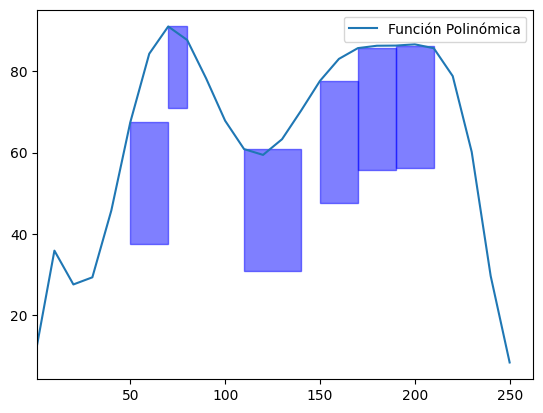

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, RegressorMixin

# Define a custom estimator class that wraps numpy.poly1d
class PolyRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, degree=1):
        self.degree = degree
 
    def fit(self, X, y=None):
        self.coeffs = np.polyfit(X.squeeze(), y, self.degree)
        return self

    def predict(self, X):
        return np.polyval(self.coeffs, X.squeeze())

# Define your data points
y = np.array([11, 34, 29, 34, 39, 64, 92, 95, 81, 75, 70, 64, 61, 62, 63, 84, 84, 85, 85, 86, 86, 87, 81, 56, 32, 8])

# Create x as a range of integers from 1 to 26
x = np.arange(len(y))*10

# Set the maximum degree of the polynomial
max_degree = 10

# Initialize lists to store the cross-validation scores and the degree values
cv_scores = []
degrees = np.arange(1, max_degree+1)

# Loop over the degree values and calculate the cross-validation scores for each degree
for degree in degrees:
    # Create a PolyRegressor object with the current degree
    model = PolyRegressor(degree=degree)

    # Calculate the cross-validation score for this degree
    cv_score = np.mean(cross_val_score(model, x.reshape(-1, 1), y, cv=5, scoring='neg_mean_squared_error'))
    cv_scores.append(cv_score)

# Find the degree with the best cross-validation score
best_degree = degrees[np.argmin(cv_scores)]

# Print the best degree
print(f"The best degree is {best_degree}")

# Fit a polynomial regression with the best degree to the data points
model = PolyRegressor(degree=best_degree)
model.fit(x.reshape(-1, 1), y)

class Rectangulo:
    def __init__(self, ancho, alto, indice_cercania):
        self.ancho = ancho
        self.alto = alto
        self.indice_cercania = indice_cercania
        self.x = None
        self.y = None

    def area(self):
        return self.ancho * self.alto

    def se_superpone(self, otro_rectangulo):
        if self.x is None or self.y is None:
            return False

        return (
            self.x < otro_rectangulo.x + otro_rectangulo.ancho and
            self.x + self.ancho > otro_rectangulo.x and
            self.y < otro_rectangulo.y + otro_rectangulo.alto and
            self.y + self.alto > otro_rectangulo.y
        )

def funcion_polinomica(x):
    return model.predict(x)

def ubicar_rectangulo(rectangulo, funcion, rectangulos_previos):
    rango_x = (0, 10)
    puntos_evaluacion = np.linspace(rango_x[0], rango_x[1], 100)

    mejor_posicion = None
    mejor_valor = None

    for x in puntos_evaluacion:
        valor = funcion(x)
        valor_rectangulo = valor - rectangulo.alto

        if mejor_valor is None or valor_rectangulo < mejor_valor:
            mejor_posicion = x
            mejor_valor = valor_rectangulo

    mejor_posicion += rectangulo.indice_cercania

    if rectangulos_previos:
        for rectangulo_previo in rectangulos_previos:
            if rectangulo.se_superpone(rectangulo_previo):
                mejor_posicion = max(mejor_posicion, rectangulo_previo.x + rectangulo_previo.ancho)

    rectangulo.x = mejor_posicion
    rectangulo.y = funcion(mejor_posicion) - rectangulo.alto

def optimizar_area_funcion(rectangulos, funcion_polinomica):
    rectangulos_ordenados = sorted(rectangulos, key=lambda r: r.indice_cercania)

    for i, rectangulo in enumerate(rectangulos_ordenados):
        rectangulos_previos = rectangulos_ordenados[:i]
        ubicar_rectangulo(rectangulo, funcion_polinomica, rectangulos_previos)

def graficar_funcion_rectangulos(funcion, rectangulos):
    # Generate x-values to plot the regression line
    x_values = np.linspace(1, x[-1], 100)
    y = funcion(x)

    fig, ax = plt.subplots()
    ax.plot(x, y, label='Función Polinómica')

    for rectangulo in rectangulos:
        if rectangulo.x is not None and rectangulo.y is not None:
            rect = Rectangle(
                (rectangulo.x, rectangulo.y),
                rectangulo.ancho, rectangulo.alto,
                alpha=0.5, color='blue'
            )
            ax.add_patch(rect)

    ax.set_xlim(left=min(x_values))
    #ax.set_ylim([min(y) - max([rect.alto for rect in rectangulos]), max(y)])
    ax.legend()

    plt.show()

# Ejemplo de uso
rectangulo1 = Rectangulo(20, 30, 50)
rectangulo2 = Rectangulo(10, 20, 70)
rectangulo3 = Rectangulo(30, 30, 110)
rectangulos = [rectangulo1, rectangulo2, rectangulo3,Rectangulo(20, 30, 150),Rectangulo(20, 30, 170),Rectangulo(20, 30, 190)]

optimizar_area_funcion(rectangulos, funcion_polinomica)
graficar_funcion_rectangulos(funcion_polinomica, rectangulos)


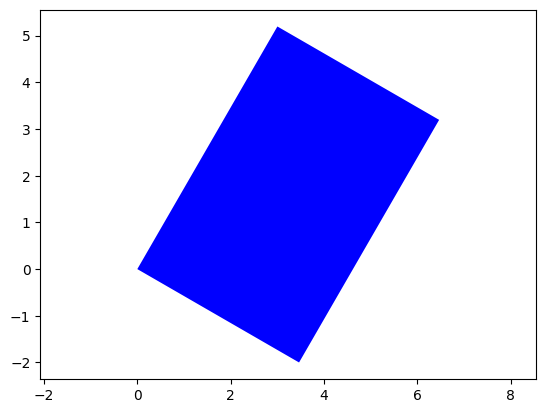

In [59]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

def graficar_rectangulo(ancho, largo, angulo):
    figura = plt.figure()
    ax = figura.add_subplot(111)

    # Calcular las coordenadas de los vértices del rectángulo no rotado
    x = [0, ancho, ancho, 0, 0]
    y = [0, 0, largo, largo, 0]

    # Aplicar la rotación al rectángulo
    angulo_radianes = math.radians(angulo)
    coseno = math.cos(angulo_radianes)
    seno = math.sin(angulo_radianes)
    x_rotado = [xi * coseno - yi * seno for xi, yi in zip(x, y)]
    y_rotado = [xi * seno + yi * coseno for xi, yi in zip(x, y)]

    # Dibujar el rectángulo rotado
    ax.add_patch(patches.Polygon(list(zip(x_rotado, y_rotado)), closed=True, facecolor='blue'))

    # Configurar los límites del gráfico
    max_dimension = max(ancho, largo)
    ax.set_xlim(-max_dimension, max_dimension)
    ax.set_ylim(-max_dimension, max_dimension)

    # Mostrar el gráfico
    plt.axis('equal')
    plt.show()

# Ejemplo de uso
ancho = 4
largo = 6
angulo = -30
graficar_rectangulo(ancho, largo, angulo)


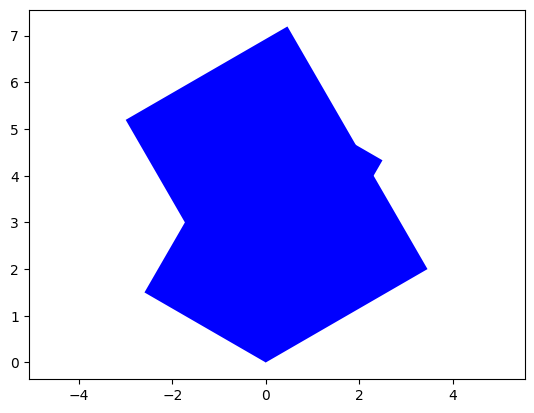

In [61]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

class Rectangulo:
    def __init__(self, ancho, largo, angulo):
        self.ancho = ancho
        self.largo = largo
        self.angulo = angulo

    def rotar(self):
        # Calcular las coordenadas de los vértices del rectángulo no rotado
        x = [0, self.ancho, self.ancho, 0, 0]
        y = [0, 0, self.largo, self.largo, 0]

        # Aplicar la rotación al rectángulo
        angulo_radianes = math.radians(self.angulo)
        coseno = math.cos(angulo_radianes)
        seno = math.sin(angulo_radianes)
        self.x_rotado = [xi * coseno - yi * seno for xi, yi in zip(x, y)]
        self.y_rotado = [xi * seno + yi * coseno for xi, yi in zip(x, y)]

def graficar_rectangulos(rectangulos):
    figura = plt.figure()
    ax = figura.add_subplot(111)

    for rectangulo in rectangulos:
        rectangulo.rotar()

        # Dibujar el rectángulo rotado
        ax.add_patch(patches.Polygon(list(zip(rectangulo.x_rotado, rectangulo.y_rotado)), closed=True, facecolor='blue'))

    # Configurar los límites del gráfico
    max_dimension = max(max(rectangulo.ancho, rectangulo.largo) for rectangulo in rectangulos)
    ax.set_xlim(-max_dimension, max_dimension)
    ax.set_ylim(-max_dimension, max_dimension)

    # Mostrar el gráfico
    plt.axis('equal')
    plt.show()

# Ejemplo de uso
rectangulo1 = Rectangulo(4, 6, 30)
rectangulo2 = Rectangulo(5, 3, 60)
rectangulo3 = Rectangulo(8, 2, 45)

rectangulos = [rectangulo1, rectangulo2]
graficar_rectangulos(rectangulos)


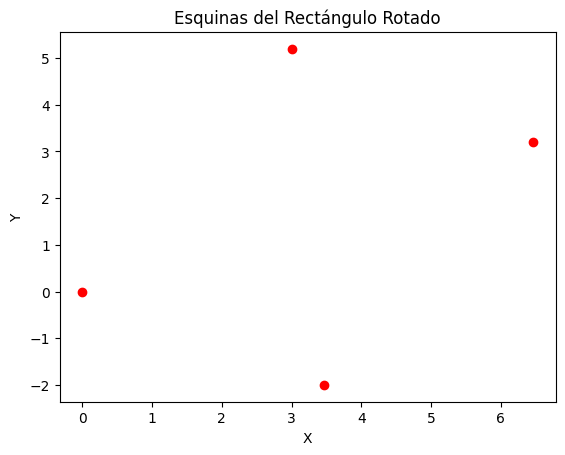

In [68]:
import matplotlib.pyplot as plt

class Rectangulo:
    def __init__(self, ancho, largo, angulo):
        self.ancho = ancho
        self.largo = largo
        self.angulo = angulo
        self.x_rotado = None
        self.y_rotado = None
        self.esquinas_rotadas = None

    def rotar(self):
        # Calcular las coordenadas de los vértices del rectángulo no rotado
        x = [0, self.ancho, self.ancho, 0, 0]
        y = [0, 0, self.largo, self.largo, 0]

        # Aplicar la rotación al rectángulo
        angulo_radianes = math.radians(self.angulo)
        coseno = math.cos(angulo_radianes)
        seno = math.sin(angulo_radianes)
        self.x_rotado = [xi * coseno - yi * seno for xi, yi in zip(x, y)]
        self.y_rotado = [xi * seno + yi * coseno for xi, yi in zip(x, y)]
        
        # Obtener las coordenadas de las esquinas rotadas
        self.esquinas_rotadas = []
        for i in range(4):
            self.esquinas_rotadas.append((self.x_rotado[i], self.y_rotado[i]))

# Ejemplo de uso
rectangulo = Rectangulo(4, 6, -30)
rectangulo.rotar()

# Graficar los puntos de las esquinas rotadas
esquinas = rectangulo.esquinas_rotadas
x_esquinas = [p[0] for p in esquinas]
y_esquinas = [p[1] for p in esquinas]

plt.scatter(x_esquinas, y_esquinas, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Esquinas del Rectángulo Rotado')
plt.show()


[0.0, 3.464101615137755, 6.464101615137754, 2.9999999999999996]
[1.9999999999999998, 0.0, 5.196152422706632, 7.196152422706632]


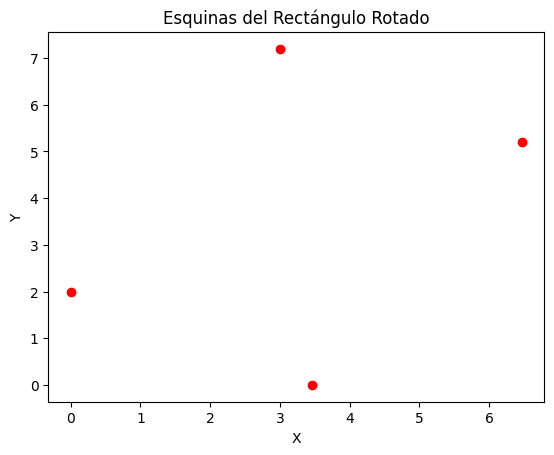

In [71]:
import matplotlib.pyplot as plt
import math

class Rectangulo:
    def __init__(self, ancho, largo, angulo):
        self.ancho = ancho
        self.largo = largo
        self.angulo = angulo
        self.x_rotado = None
        self.y_rotado = None
        self.esquinas_rotadas = None

    def rotar(self):
        # Calcular las coordenadas de los vértices del rectángulo no rotado
        x = [0, self.ancho, self.ancho, 0, 0]
        y = [0, 0, self.largo, self.largo, 0]

        # Aplicar la rotación al rectángulo
        angulo_radianes = math.radians(self.angulo)
        coseno = math.cos(angulo_radianes)
        seno = math.sin(angulo_radianes)
        self.x_rotado = [xi * coseno - yi * seno for xi, yi in zip(x, y)]
        self.y_rotado = [xi * seno + yi * coseno for xi, yi in zip(x, y)]
        
        # Obtener las coordenadas de las esquinas rotadas
        self.esquinas_rotadas = []
        for i in range(4):
            self.esquinas_rotadas.append((self.x_rotado[i], self.y_rotado[i]))

        # Realizar la traslación
        x_min = min(self.x_rotado)
        y_min = min(self.y_rotado)
        self.x_rotado = [x - x_min for x in self.x_rotado]
        self.y_rotado = [y - y_min for y in self.y_rotado]
        self.esquinas_rotadas = [(x - x_min, y - y_min) for x, y in self.esquinas_rotadas]

# Ejemplo de uso
rectangulo = Rectangulo(4, 6, -30)
rectangulo.rotar()

# Graficar los puntos de las esquinas rotadas
esquinas = rectangulo.esquinas_rotadas
x_esquinas = [p[0] for p in esquinas]
y_esquinas = [p[1] for p in esquinas]

print(x_esquinas)
print(y_esquinas)

plt.scatter(x_esquinas, y_esquinas, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Esquinas del Rectángulo Rotado')
plt.show()


Con cada rectangulo empezar a recorrer la función polinómica empezando desde X=0,y=0
Y aumentando en X. Cada vez que X aumenta, se mira si hay rectangulos que ya estén ubicado y que se solapen.
Si si se solapan, se sigue intenando en X+1. Si no se pudo, se empieza a aumentar Y+1 a las coordenadas del rectangulo
Y así sucesivamente.